In [1]:
import os
import pytesseract
from PIL import Image

# Path to input and output directories
input_dir = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\images_poem_devsi','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\images_poem_j']
output_dir = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_devsi','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_j']

for i in range(2):
    # Loop through all files in the input directory
    for filename in os.listdir(input_dir[i]):
        # Check if file is an image file
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Construct paths to input and output files
            input_file = os.path.join(input_dir[i], filename)
            output_file = os.path.join(output_dir[i], os.path.splitext(filename)[0] + '.txt')
            # Open image using Pillow library
            with Image.open(input_file) as img:
                # Convert image to grayscale
                img = img.convert('L')
                # Extract text using pytesseract
                text = pytesseract.image_to_string(img)
                # Save text to output file
                with open(output_file, 'w') as f:
                    f.write(text)
    i=i+1


In [2]:
import os
import nltk

nltk.download('punkt')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Path to input and output directories
input_dir = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_devsi','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_j']
output_dir = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_devsi','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_j']


for i in range(2):
    # Loop through all files in the input directory
    for filename in os.listdir(input_dir[i]):
        # Check if file is a text file
        if filename.endswith('.txt'):
            # Construct paths to input and output files
            input_file = os.path.join(input_dir[i], filename)
            output_file = os.path.join(output_dir[i], filename)
            # Open input and output files
            with open(input_file, 'r') as f, open(output_file, 'w') as out:
                # Loop through each line (sentence) in the input file
                for line in f:
                    # Perform sentiment analysis on sentence
                    scores = sid.polarity_scores(line.strip())
                    # Determine sentiment label based on compound score
                    if scores['compound'] >= 0.05:
                        label = 'positive'
                    elif scores['compound'] <= -0.05:
                        label = 'negative'
                    else:
                        label = 'neutral'
                    # Write sentiment label and sentence to output file
                    out.write(f'{label}\t{line}')
    i=i+1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Devsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Devsi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import os

# Path to folder containing sentiment analysis files
folder_path = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_devsi','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_j']

# Path to output file
output_file = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\scores\\score_devsi.txt','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\scores\\score_jatsya.txt']

for i in range(2):
    
    # Initialize counters for positive and negative sentences
    pos_count = 0
    neg_count = 0

    # Loop through all files in the folder
    for filename in os.listdir(folder_path[i]):
        # Check if file is a sentiment analysis file
        if filename.endswith('.txt'):
            # Reset counters for positive and negative sentences for each file
            pos_count_file = 0
            neg_count_file = 0

            # Construct path to sentiment analysis file
            sentiment_file = os.path.join(folder_path[i], filename)
            # Open sentiment analysis file
            with open(sentiment_file, 'r') as f:
                # Loop through each line (sentence) in the sentiment analysis file
                for line in f:
                    # Split sentiment label and sentence
                    line = line.strip().split('\t')
                    if len(line) == 2:
                        label, sentence = line
                        # Increment counter based on sentiment label
                        if label == 'positive':
                            pos_count_file += 1
                        elif label == 'negative':
                            neg_count_file += 1

            # Write counts for current file to output file
            with open(output_file[i], 'a') as out:
                out.write(f'{filename}: Positive sentences: {pos_count_file}, Negative sentences: {neg_count_file}\n')

            # Increment overall counters for positive and negative sentences
            pos_count += pos_count_file
            neg_count += neg_count_file

    # Write overall counts to output file
    with open(output_file[i], 'a') as out:
        out.write(f'Total: Positive sentences: {pos_count}, Negative sentences: {neg_count}\n')
        out.write(f'Probability of a poet being a positive thinker: {(pos_count*100)/(pos_count+neg_count)}\n')
    
    i=i+1

# word cloud

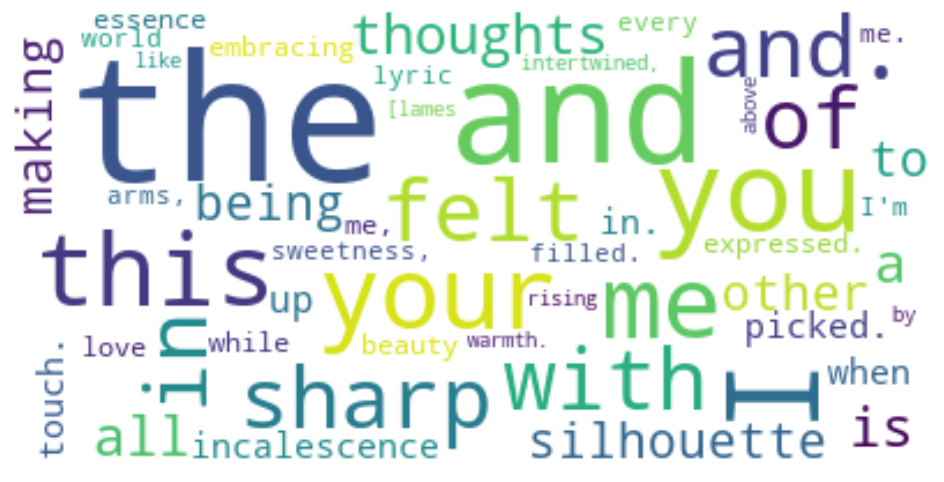

In [4]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
import param

# Define the path to the directory containing the text files
directory = 'E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_devsi'

# Create a list to store the words in all files
all_words = []

# Loop over all files in the directory and extract the words
for filename in os.listdir(directory):
    with open(os.path.join(directory, filename), 'r') as file:
        # Read the file content and split it into words
        words = file.read().split()
        # Add the words to the list of all words
        all_words.extend(words)

# Define a function to generate the wordcloud
class WordCloudApp(param.Parameterized):
    num_words = param.Integer(default=50)

    @param.depends('num_words')
    def generate_wordcloud(self):
        # Create a Pandas DataFrame with the word counts
        word_counts = pd.Series(all_words).value_counts()
        # Get the top n words as specified by the slider
        top_words = dict(word_counts[:self.num_words])
        # Generate the wordcloud
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(top_words)
        # Display the wordcloud
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        return pn.pane.Matplotlib(plt.gcf())

word_cloud_app = WordCloudApp()

# Define the Panel components
wordcloud_panel = pn.Row(word_cloud_app.generate_wordcloud, width=800)
wordcloud_param_panel = pn.Row(pn.Param(word_cloud_app.param, parameters=['num_words']), width=800)

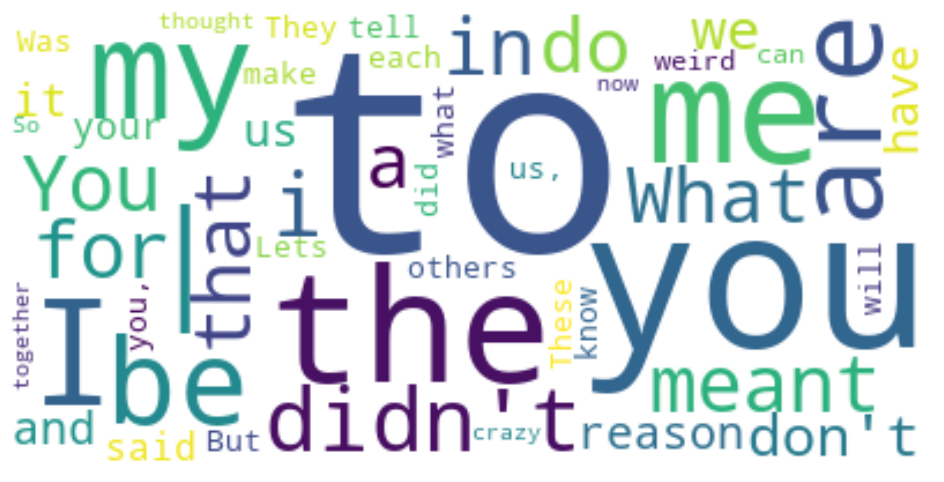

In [5]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
import param

# Define the path to the directory containing the text files
directory_j = 'E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\converted_texts_poem_j'

# Create a list to store the words in all files
all_words_j = []

# Loop over all files in the directory and extract the words
for filename in os.listdir(directory_j):
    with open(os.path.join(directory_j, filename), 'r') as file:
        # Read the file content and split it into words
        words = file.read().split()
        # Add the words to the list of all words
        all_words_j.extend(words)

# Define a function to generate the wordcloud
class WordCloudApp_j(param.Parameterized):
    num_words = param.Integer(default=50)

    @param.depends('num_words')
    def generate_wordcloud(self):
        # Create a Pandas DataFrame with the word counts
        word_counts_j = pd.Series(all_words_j).value_counts()
        # Get the top n words as specified by the slider
        top_words_j = dict(word_counts_j[:self.num_words])
        # Generate the wordcloud
        wordcloud_j = WordCloud(width=400, height=200, background_color='white').generate_from_frequencies(top_words_j)
        # Display the wordcloud
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud_j, interpolation='bilinear')
        plt.axis('off')
        return pn.pane.Matplotlib(plt.gcf())

word_cloud_app_j = WordCloudApp_j()

# Define the Panel components
wordcloud_panel_j = pn.Row(word_cloud_app_j.generate_wordcloud, width=800)
wordcloud_param_panel_j = pn.Row(pn.Param(word_cloud_app_j.param, parameters=['num_words']), width=800)

# score

In [6]:
import re
import os

file = ['E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\scores\\score_devsi.txt','E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\scores\\score_jatsya.txt']

probabilities=[]

for i in range(2):
    
    # Open the file and read its contents
    with open(file[i], 'r') as f:
        contents = f.read()


    # Use a regular expression to find the line with the desired phrase and extract the value
    match = re.search(r"Probability of a poet being a positive thinker: ([\d.]+)", contents)
    if match:
        probability = float(match.group(1))
        probabilities.append(probability)
        print("Probability of a poet being a positive thinker:", probability)
    else:
        print("Could not find probability in file.")
        
    i=i+1
print("Probabilities:", probabilities)

Probability of a poet being a positive thinker: 90.9090909090909
Probability of a poet being a positive thinker: 50.0
Probabilities: [90.9090909090909, 50.0]


Launching server at http://localhost:64284


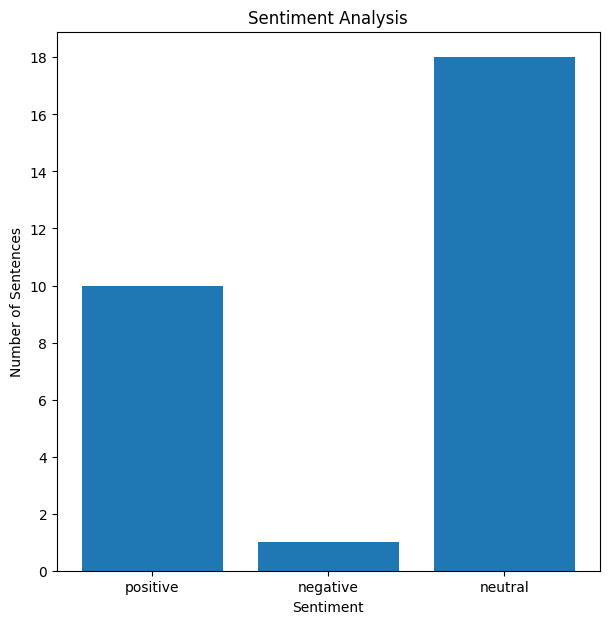

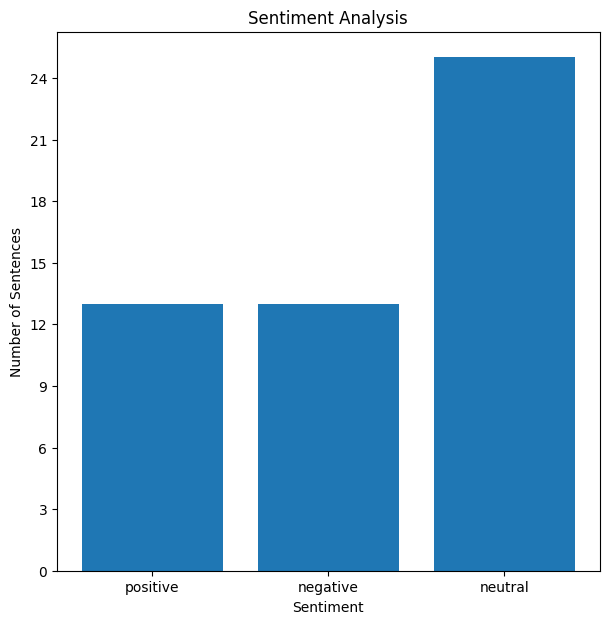

In [7]:
import os
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt

# ------------------------------------------------- devsi ----------------------------------------------------------

sentiment_dir = "E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_devsi"
sentiments = ['positive', 'negative', 'neutral']

# Count the number of sentences in each sentiment category
sentences = {sentiment: 0 for sentiment in sentiments}

for filename in os.listdir(sentiment_dir):
    with open(os.path.join(sentiment_dir, filename), 'r') as f:
        for line in f:
            line = line.strip()
            if '\t' not in line:
#                 print(f"Skipping line {line} in file {filename}: no tab character found")
                continue
            sentiment, sentence = line.split('\t')
            if sentiment in sentences:
                sentences[sentiment] += 1

import matplotlib.ticker as ticker

# Create the bar chart
fig, ax = plt.subplots(figsize=(7, 7))
ax.bar(sentiments, [sentences[sentiment] for sentiment in sentiments])
ax.set_title("Sentiment Analysis")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Sentences")

# Set the y-axis ticks to integers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

chart = pn.pane.Matplotlib(fig)

# Create the panel dashboard
pn.extension()

positive_sentences = []
negative_sentences = []
neutral_sentences = []

for filename in os.listdir(sentiment_dir):
    with open(os.path.join(sentiment_dir, filename), 'r') as f:
        for line in f:
            line = line.strip()
            if '\t' not in line:
#                 print(f"Skipping line {line} in file {filename}: no tab character found")
                continue
            sentiment, sentence = line.split('\t')
            if sentiment == 'positive':
                positive_sentences.append(sentence)
            elif sentiment == 'negative':
                negative_sentences.append(sentence)
            elif sentiment == 'neutral':
                neutral_sentences.append(sentence)

positive_text = pn.widgets.TextAreaInput(name='Positive Sentences', value='\n'.join(positive_sentences),height=500)
negative_text = pn.widgets.TextAreaInput(name='Negative Sentences', value='\n'.join(negative_sentences),height=500)
neutral_text = pn.widgets.TextAreaInput(name='Neutral Sentences', value='\n'.join(neutral_sentences),height=500)


# ----------------------------------------------------- jatsya ---------------------------------------------------------------


sentiment_dir_j = "E:\\datascienceproj\\my_poetry_account_analysis\\topic_modeling\\sentiment_poem_j"
sentiments_j = ['positive', 'negative', 'neutral']

# Count the number of sentences in each sentiment category
sentences_j = {sentiment_j: 0 for sentiment_j in sentiments_j}

for filename in os.listdir(sentiment_dir_j):
    with open(os.path.join(sentiment_dir_j, filename), 'r') as f:
        for line in f:
            line = line.strip()
            if '\t' not in line:
#                 print(f"Skipping line {line} in file {filename}: no tab character found")
                continue
            sentiment_j, sentence = line.split('\t')
            if sentiment_j in sentences_j:
                sentences_j[sentiment_j] += 1

import matplotlib.ticker as ticker

# Create the bar chart
fig_j, ax = plt.subplots(figsize=(7, 7))
ax.bar(sentiments_j, [sentences_j[sentiment_j] for sentiment_j in sentiments_j])
ax.set_title("Sentiment Analysis")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Number of Sentences")

# Set the y-axis ticks to integers
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

chart_j = pn.pane.Matplotlib(fig_j)

# Create the panel dashboard
pn.extension()

positive_sentences_j = []
negative_sentences_j = []
neutral_sentences_j = []

for filename in os.listdir(sentiment_dir_j):
    with open(os.path.join(sentiment_dir_j, filename), 'r') as f:
        for line in f:
            line = line.strip()
            if '\t' not in line:
#                 print(f"Skipping line {line} in file {filename}: no tab character found")
                continue
            sentiment_j, sentence = line.split('\t')
            if sentiment_j == 'positive':
                positive_sentences_j.append(sentence)
            elif sentiment_j == 'negative':
                negative_sentences_j.append(sentence)
            elif sentiment_j == 'neutral':
                neutral_sentences_j.append(sentence)

positive_text_j = pn.widgets.TextAreaInput(name='Positive Sentences', value='\n'.join(positive_sentences_j),height=500)
negative_text_j = pn.widgets.TextAreaInput(name='Negative Sentences', value='\n'.join(negative_sentences_j),height=500)
neutral_text_j = pn.widgets.TextAreaInput(name='Neutral Sentences', value='\n'.join(neutral_sentences_j),height=500)


# ------------------------------------------------------------------------------------------------------------------------


template = pn.template.FastListTemplate(
    title='Winters Aconite Explorer', 
    sidebar=[pn.pane.Markdown("# My poetry page analysis"), 
             pn.pane.Markdown("#### This app analyzes the content of my poem posts and shows comparison with my co-poet using sentiment analysis. It includes bar graph, sentiment category of sentences and the wordcloud."),
             ],
    main=[ pn.pane.Markdown("### Devsi\'s  Dashboard", height=40),
          
          pn.Row(pn.Column(
        pn.Tabs(
    ('Positive', pn.Column(positive_text,width=500)),
    ('Negative', pn.Column(negative_text,width=500)),
    ('Neutral', pn.Column(neutral_text, width=500)),
    ('Chart', pn.Column(chart,width=550, height=500))
    )), pn.Column( 
                  pn.Row(pn.Column(wordcloud_param_panel,width=520),
                         pn.Column("**Probability of a poet being a positive thinker : **" + str(probabilities[0]))), 
                  pn.Row(wordcloud_panel, width=400)) ),
          
          
         pn.pane.Markdown("### Co-poet\'s  Dashboard", height=40),
          pn.Row(pn.Column(
        pn.Tabs(
    ('Positive', pn.Column(positive_text_j,width=500)),
    ('Negative', pn.Column(negative_text_j,width=500)),
    ('Neutral', pn.Column(neutral_text_j, width=500)),
    ('Chart', pn.Column(chart_j,width=550, height=500))
    )), pn.Column( 
                  pn.Row(pn.Column(wordcloud_param_panel_j,width=520),
                         pn.Column("**Probability of a poet being a positive thinker : **" + str(probabilities[1]))), 
                  pn.Row(wordcloud_panel_j, width=400)) )
    ],
    accent_base_color="#FFEAEA",
    header_background="#E11299",
)

template.show()